In [2]:
import pickle
with open('new_df.pickle', 'rb') as handle:
    new_df = pickle.load(handle)
with open('target.pickle', 'rb') as handle:
    target = pickle.load(handle)
with open('boruta.pickle', 'rb') as handle:
    br = pickle.load(handle)

In [4]:
target['count']=target['E2H']+target['E2R']+target['E2S']+target['E2E']+target['E2O']+target['E2K']
target['count'].value_counts()

count
0    1064
1     245
2     103
3      53
4      34
5      15
6      12
Name: count, dtype: int64

In [15]:
# print(new_df.columns)
print(target.columns)
# print(br)

Index(['E2H', 'E2R', 'E2S', 'E2E', 'E2O', 'E2K', 'ny', 'count'], dtype='object')


In [16]:
target['serious']=target['count']>1
target['serious'].astype(int)
target['serious'].value_counts()

serious
False    1309
True      217
Name: count, dtype: int64

In [17]:
target['morethan3']=target['count']>2
target['morethan3'].astype(int)
target['morethan3'].value_counts()

morethan3
False    1412
True      114
Name: count, dtype: int64

In [18]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import numpy as np

/p_3_10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/p_3_10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/p_3_10/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was no

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KMeans(), k=10)
model.fit(new_df)
model.poof()

NameError: name 'KMeans' is not defined

In [74]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.00001, min_samples=3).fit(new_df)
target['db']=db.labels_


In [75]:
target['db'].value_counts()

-1    1526
Name: db, dtype: int64

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(new_df)
cluster=kmeans.labels_


In [9]:

pca=TSNE(n_components=2,perplexity=100)
newData=pca.fit_transform(new_df)



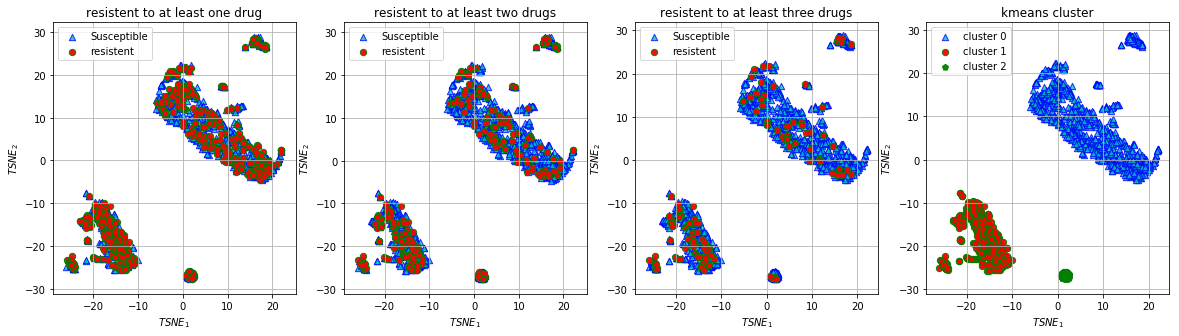

In [19]:
fig = plt.figure(figsize=(20,5))
ax1,ax2,ax3,ax4 = fig.subplots(1,4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$TSNE_{1}$')
ax1.set_ylabel('$TSNE_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$TSNE_{1}$')
ax2.set_ylabel('$TSNE_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$TSNE_{1}$')
ax3.set_ylabel('$TSNE_{2}$')

ax3.set_title('resistent to at least three drugs')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$TSNE_{1}$')
ax4.set_ylabel('$TSNE_{2}$')

ax4.set_title('kmeans cluster')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

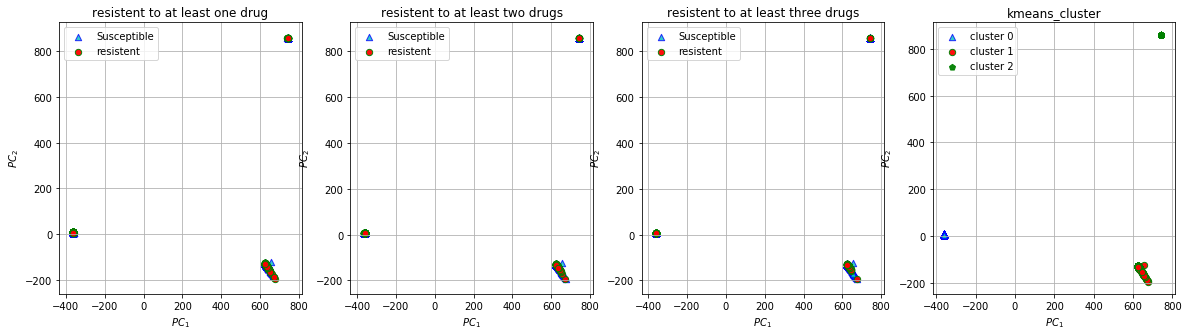

In [20]:

pca=PCA(n_components=2)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,5))
ax1,ax2,ax3,ax4 = fig.subplots(1,4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$PC_{1}$')
ax1.set_ylabel('$PC_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$PC_{1}$')
ax2.set_ylabel('$PC_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$PC_{1}$')
ax3.set_ylabel('$PC_{2}$')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$PC_{1}$')
ax4.set_ylabel('$PC_{2}$')

ax4.set_title('kmeans_cluster')

ax3.set_title('resistent to at least three drugs')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


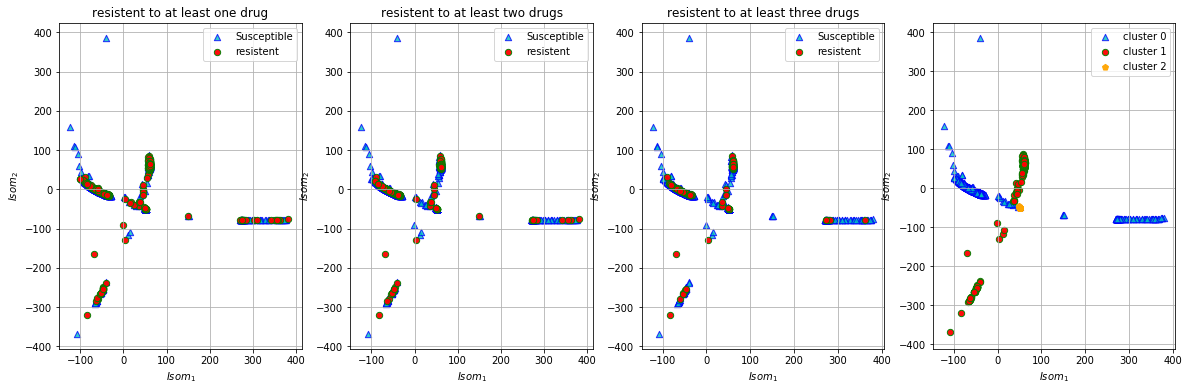

In [26]:

pca=Isomap(n_components=2,n_neighbors=30)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,6))
ax1, ax2,ax3,ax4 = fig.subplots(1, 4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$Isom_{1}$')
ax1.set_ylabel('$Isom_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$Isom_{1}$')
ax2.set_ylabel('$Isom_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$Isom_{1}$')
ax3.set_ylabel('$Isom_{2}$')

ax3.set_title('resistent to at least three drugs')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='orange', alpha=0.95, s=40)
ax4.set_xlabel('$Isom_{1}$')
ax4.set_ylabel('$Isom_{2}$')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

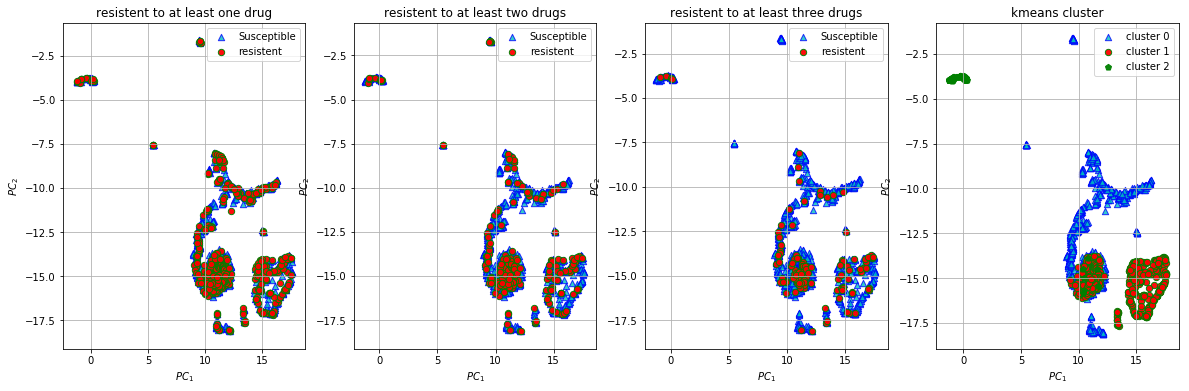

In [28]:

pca=umap.UMAP(n_neighbors=30,min_dist=0.1)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,6))
ax1, ax2,ax3 ,ax4= fig.subplots(1, 4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$PC_{1}$')
ax1.set_ylabel('$PC_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$PC_{1}$')
ax2.set_ylabel('$PC_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$PC_{1}$')
ax3.set_ylabel('$PC_{2}$')



ax3.set_title('resistent to at least three drugs')
ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$PC_{1}$')
ax4.set_ylabel('$PC_{2}$')

ax4.set_title('kmeans cluster')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

NameError: name 'MiniBatchKMeans' is not defined